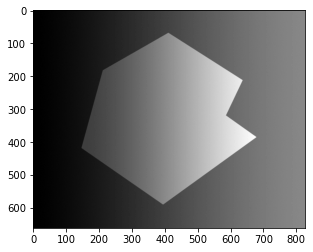

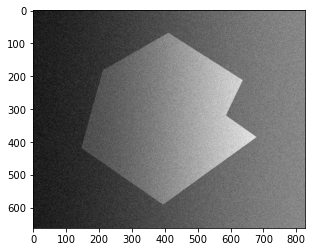

In [6]:
## Parte 1 
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rombo.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray_norm = cv2.normalize(gray.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)


noise = np.random.random(gray.shape)*0.3

output = gray_norm + noise


plt.imshow(gray, cmap='gray')
plt.show()

plt.imshow(output, cmap='gray')
plt.show()




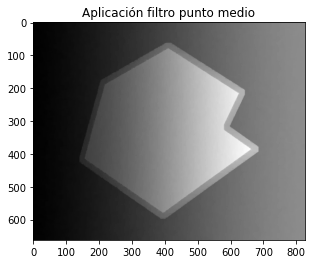

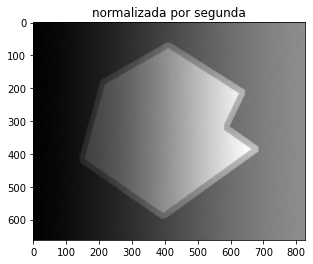

In [230]:
#1. Buscar filtro
from scipy.ndimage import generic_filter

def filtro_pto_medio(A):
    S= 0.5*( np.max(A.flatten()) +  np.min(A.flatten())) 
    return S

#aplicamos el filtro punto_medio
punto_medio= generic_filter(output,filtro_pto_medio, [15,15])

gray2 = punto_medio

plt.figure()
plt.imshow(gray2, cmap="gray")
plt.title("Aplicación filtro punto medio")
plt.show()


norm = cv2.normalize(gray2, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(norm, cmap="gray")
plt.title("normalizada por segunda")
plt.show()


C:\Users\benja\AppData\Local\Temp/ipykernel_11076/89329158.py:10: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  sato = filters.sato(norm)


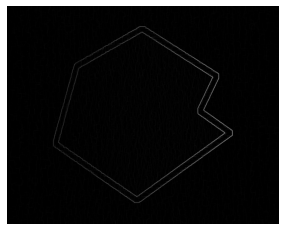

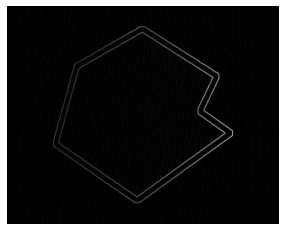

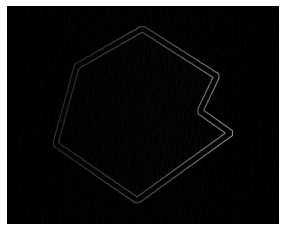

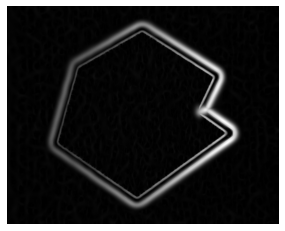

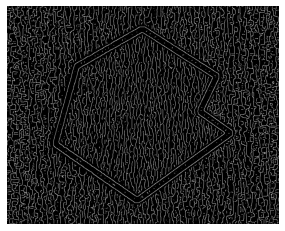

In [419]:
### 3. Determine los bordes
## Utilizamos diferentes tecnicas para ver utilizar el mejor resultado

from skimage import filters
from skimage import feature

roberts = filters.roberts(norm)
prewitt = filters.prewitt(norm)
sobel = filters.sobel(norm)
sato = filters.sato(norm)
canny = feature.canny(norm, sigma=2)


plt.imshow(roberts, cmap='gray')
plt.axis('off')
plt.show()


plt.imshow(prewitt, cmap='gray')
plt.axis('off')
plt.show()


plt.imshow(sobel, cmap='gray')
plt.axis('off')
plt.show()


plt.imshow(sato, cmap='gray')
plt.axis('off')
plt.show()


plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()



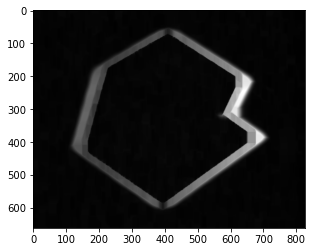

In [416]:
### 4. Unir bordes 

kernelTest = cv2.getStructuringElement(cv2.MORPH_CROSS,(25,5))
kernelTest2 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,30))

apertura = cv2.dilate(sato,kernelTest)
ImagenBorde = cv2.erode(apertura,kernelTest2)

plt.imshow(ImagenBorde, cmap='gray')
plt.show()


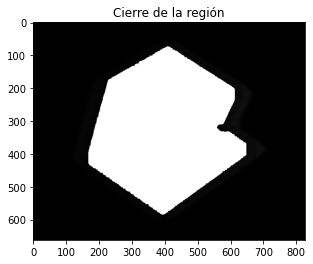

In [417]:
#Es necesario cambiar los valores de los pixeles a uint8
cambio = ImagenBorde.astype("uint8")
imagenFinal = cambio.copy() #copiamos

cv2.floodFill(imagenFinal, None, (400,400),(255,255,255)) #aplicamos floodfill
plt.imshow(imagenFinal, cmap="gray")
plt.show()
